In [11]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
#tf.enable_eager_execution()
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [12]:
nfl = pd.read_csv('data/nfl_scores.csv')

In [13]:
nfl['schedule_date'] = pd.to_datetime(nfl['schedule_date'])

In [14]:
nfl.index = nfl['schedule_date']

In [15]:
nfl = nfl.drop(columns='schedule_date')

In [16]:
nfl_1 = nfl['2014-09-04':'2019-12-09']

In [17]:
#normalize weather temp
nfl_1['weather_temperature'].max()
nfl_1['weather_temperature'] = pd.cut(nfl_1['weather_temperature'],
                                     bins = [-10,-5,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,np.inf],
                                     labels = [-7.5,-2.5,2.5,7.5,12.5,17.5,22.5,27.5,32.5,37.5,42.5,
                                               47.5,52.5,57.5,62.5,67.5,72.5,77.5,82.5,87.5,92.5,97.5,102.5])

C:\Users\nickg\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
nfl_1['home_win'] = nfl_1['score_home'] > nfl_1['score_away']
    

C:\Users\nickg\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
nfl_1.home_win = nfl_1.home_win.astype(int)

In [20]:
undecided = nfl_1

In [21]:
undecided_2 = undecided

In [22]:
undecided_2 = undecided_2.replace(['Arizona Cardinals', 
                                  'Atlanta Falcons',
                                  'Baltimore Ravens',
                                   'Buffalo Bills',
                                   'Carolina Panthers',
                                   'Chicago Bears',
                                   'Cincinnati Bengals',
                                   'Cleveland Browns',
                                   'Dallas Cowboys',
                                   'Denver Broncos',
                                   'Detroit Lions',
                                   'Green Bay Packers',
                                   'Houston Texans',
                                   'Indianapolis Colts',
                                   'Jacksonville Jaguars',
                                   'Kansas City Chiefs',
                                   'Los Angeles Chargers',
                                   'Los Angeles Rams',
                                   'Miami Dolphins',
                                   'Minnesota Vikings',
                                   'New Orleans Saints',
                                   'New York Giants',
                                   'New York Jets',
                                   'Oakland Raiders',
                                   'Philadelphia Eagles',
                                   'Pittsburgh Steelers',
                                   'San Francisco 49ers',
                                   'Seattle Seahawks',
                                   'Tampa Bay Buccaneers',
                                   'Tennessee Titans',
                                   'Washington Redskins',
                                  'St. Louis Rams',
                                  'San Diego Chargers',
                                  'New England Patriots',
                                  'Division',
                                  'Conference',
                                  'SuperBowl',
                                   'Superbowl',
                                  'WildCard'],
                                  [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,
                                   18,19,20,21,22,23,24,25,26,27,28,29,30,31,
                                   32,33,34,35,36,37,37, 38])

In [23]:
#fav home
undecided_2 = undecided_2.replace(['ARI', 
                                  'ATL',
                                  'BAL',
                                   'BUF',
                                   'CAR',
                                   'CHI',
                                   'CIN',
                                   'CLE',
                                   'DAL',
                                   'DEN',
                                   'DET',
                                   'GB',
                                   'HOU',
                                   'IND',
                                   'JAX',
                                   'KC',
                                   'LAC',
                                   'LAR',
                                   'MIA',
                                   'MIN',
                                   'NO',
                                   'NYG',
                                   'NYJ',
                                   'OAK',
                                   'PHI',
                                   'PIT',
                                   'SF',
                                   'SEA',
                                   'TB',
                                   'TEN',
                                   'WAS',
                                  'STR',
                                  'SDC',
                                  'NE',
                                  ],
                                  [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,
                                   18,19,20,21,22,23,24,25,26,27,28,29,30,31,
                                   32,33,34])

In [24]:
#fav home
undecided_2['home_fav'] = undecided_2['team_home'] == undecided_2['team_favorite_id']
undecided_2.home_fav = undecided_2.home_fav.astype(int)

In [25]:
features = ['schedule_week', 'weather_temperature', 'weather_wind_mph',
           'team_home', 'team_away', 'spread_favorite', 'over_under_line','home_fav'
            ]

In [26]:
x = undecided_2.loc[:, features]
x = x.replace('Wildcard', 18, regex=True)

In [27]:
y = undecided_2.home_win

In [28]:
#train data one day behind

In [29]:
train_data = x['2014-09-04':'2019-12-08']

In [30]:
train_y = undecided_2.home_win

In [31]:
train_y_data = train_y['2014-09-04':'2019-12-08']

In [32]:
#test range(optional)
test_data = x['2019-09-08':'2019-12-04']
test_y_data = train_y['2019-09-08':'2019-12-04']

In [33]:
undecided_2

,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,home_win,home_fav
schedule_date,,,,,,,,,,,,,,,,,,
2014-09-04,2014,1,False,28,36.0,16.0,12,28,-4.5,46.5,CenturyLink Field,False,67.5,5.0,NaN,NaN,1,1
2014-09-07,2014,1,False,2,37.0,34.0,21,21,-3.0,52,Georgia Dome,False,72.5,0.0,NaN,DOME,1,0
2014-09-07,2014,1,False,3,16.0,23.0,7,3,-1.0,42.5,M&T Bank Stadium,False,77.5,0.0,NaN,NaN,0,1
2014-09-07,2014,1,False,6,20.0,23.0,4,6,-7.0,47,Soldier Field,False,77.5,7.0,NaN,NaN,0,1
2014-09-07,2014,1,False,9,17.0,28.0,27,27,-3.5,51,Cowboys Stadium,False,72.5,0.0,NaN,DOME,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-08,2019,14,False,21,46.0,48.0,27,27,-2.5,43.5,Mercedes-Benz Superdome,False,72.5,0.0,NaN,DOME,0,0
2019-12-08,2019,14,False,23,22.0,21.0,19,23,-5.0,46,MetLife Stadium,False,37.5,5.0,NaN,NaN,1,1
2019-12-08,2019,14,False,24,21.0,42.0,30,30,-3.0,47.5,Oakland Coliseum,False,57.5,6.0,NaN,NaN,0,0


In [34]:
#scikit DNN

In [35]:
from sklearn.neural_network import MLPClassifier

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=8*[94], random_state=10)

In [38]:
model.fit(train_data,train_y_data)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[94, 94, 94, 94, 94, 94, 94, 94],
              learning_rate='constant', learning_rate_init=0.001, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=10, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [39]:
pred = model.predict(x)

In [40]:
pred = pd.DataFrame(pred)

In [41]:
nfl_1.tail(14)

,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,home_win
schedule_date,,,,,,,,,,,,,,,,,
2019-12-08,2019,14,False,Atlanta Falcons,40.0,20.0,Carolina Panthers,ATL,-3.5,48,Mercedes-Benz Stadium,False,72.5,0.0,NaN,DOME,1
2019-12-08,2019,14,False,Buffalo Bills,17.0,24.0,Baltimore Ravens,BAL,-6.0,44,New Era Field,False,32.5,16.0,NaN,NaN,0
2019-12-08,2019,14,False,Cleveland Browns,27.0,19.0,Cincinnati Bengals,CLE,-7.0,42.5,FirstEnergy Stadium,False,42.5,15.0,NaN,NaN,1
2019-12-08,2019,14,False,Green Bay Packers,20.0,15.0,Washington Redskins,GB,-13.5,41.5,Lambeau Field,False,37.5,12.0,NaN,NaN,1
2019-12-08,2019,14,False,Houston Texans,24.0,38.0,Denver Broncos,HOU,-9.0,43,NRG Stadium,False,62.5,6.0,NaN,DOME,0
2019-12-08,2019,14,False,Jacksonville Jaguars,10.0,45.0,Los Angeles Chargers,LAC,-3.0,43.5,TIAA Bank Field,False,62.5,11.0,NaN,NaN,0
2019-12-08,2019,14,False,Los Angeles Rams,28.0,12.0,Seattle Seahawks,LAR,-1.0,47,Los Angeles Memorial Coliseum,False,62.5,8.0,NaN,NaN,1
2019-12-08,2019,14,False,Minnesota Vikings,20.0,7.0,Detroit Lions,MIN,-12.5,43.5,U.S. Bank Stadium,False,72.5,0.0,NaN,DOME,1
2019-12-08,2019,14,False,New England Patriots,16.0,23.0,Kansas City Chiefs,NE,-3.0,49,Gillette Stadium,False,32.5,6.0,NaN,NaN,0


In [42]:
#accuarcy predictor day of
pred_final = pred.tail(14)
y = nfl_1['home_win']
y_final = y.tail(14)
y_final = pd.DataFrame(y_final)
accuracy_score(pred_final, y_final)

0.8571428571428571

In [43]:
#TTS 3.0 final predictions
pred_final

,0
1529,1
1530,0
1531,1
1532,1
1533,1
1534,0
1535,1
1536,1
1537,1
1538,0


In [44]:
stop
print('{:>8s} | {:8s}'.format('depth', 'accuracy'))
print(20 * '-')
for depth in range(90,110):
    model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=8*[depth], random_state=10)
    model.fit(train_data,train_y_data)
    acc = accuracy_score(test_y_data, model.predict(test_data))
    print('{:>8d} | {:8.2f}'.format(depth, acc))

NameError: name 'stop' is not defined

In [ ]:
accuracy_score(pred,y)

In [ ]:
#decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(max_depth=28,random_state=50)

In [ ]:
model.fit(train_data, train_y_data)

In [ ]:
pred = model.predict(x)

In [ ]:
pred = pd.DataFrame(pred)

In [ ]:
#decision tree predictions
pred.tail(14)

In [ ]:
final_pred = pred.tail(11)
y = nfl_1['home_win']
y_final = y.tail(11)
y_final = pd.DataFrame(y_final)

In [ ]:
accuracy_score(final_pred,y_final)

In [ ]:
stop
print('{:>8s} | {:8s}'.format('depth', 'accuracy'))
print(20 * '-')
for depth in range(10,100,10):
    model = DecisionTreeClassifier(max_depth=depth, random_state = 50)
    model.fit(train_data,train_y_data)
    acc = accuracy_score(test_y_data, model.predict(test_data))
    print('{:>8d} | {:8.2f}'.format(depth, acc))

In [ ]:
#scalar data

In [ ]:
#from sklearn import preprocessing

In [ ]:
#scaler = preprocessing.MinMaxScaler()

In [ ]:
#train_data = scaler.fit_transform(train_data)

In [ ]:
#train_data = pd.DataFrame(train_data)

In [ ]:
#train_data

In [ ]:
#pred

In [ ]:
#pred[0].value_counts()

In [ ]:
#SGDClassifier
from sklearn.linear_model import SGDClassifier

In [ ]:
model = SGDClassifier(loss="hinge", penalty="l2", max_iter=100, random_state=42)

In [ ]:
model.fit(train_data, train_y_data)

In [ ]:
pred = model.predict(x)

In [ ]:
pred = pd.DataFrame(pred)

In [ ]:
pred.tail(12)

In [ ]:
final_pred = pred.tail(12)
y = nfl_1['home_win']
y_final = y.tail(12)
y_final = pd.DataFrame(y_final)

In [ ]:
stop
print('{:>8s} | {:8s}'.format('depth', 'accuracy'))
print(20 * '-')
for depth in range(10,200,10):
    model = SGDClassifier(loss="hinge", penalty="l2", max_iter=depth)
    model.fit(train_data,train_y_data)
    acc = accuracy_score(test_y_data, model.predict(test_data))
    print('{:>8d} | {:8.2f}'.format(depth, acc))

In [ ]:
accuracy_score(final_pred, y_final)

In [ ]:
#gradient boosting classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
        max_depth=1, random_state=0, loss='deviance')

In [ ]:
model.fit(train_data, train_y_data)

In [ ]:
pred = model.predict(x)
pred = pd.DataFrame(pred)

In [ ]:
pred.tail(14)

In [ ]:
accuracy_score(pred,y)

In [ ]:
#random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [ ]:
model = RandomForestClassifier(n_estimators=100, max_depth=1,
                               random_state=0)

In [ ]:
model.fit(train_data, train_y_data)

In [ ]:
pred = model.predict(x)
pred = pd.DataFrame(pred)

In [ ]:
accuracy_score(pred,y)

In [ ]:
stop
print('{:>8s} | {:8s}'.format('depth', 'accuracy'))
print(20 * '-')
for depth in range(1,15):
    model = RandomForestClassifier(n_estimators=100, max_depth=depth,
                               random_state=0)
    model.fit(train_data,train_y_data)
    acc = accuracy_score(test_y_data, model.predict(test_data))
    print('{:>8d} | {:8.2f}'.format(depth, acc))

In [ ]:
pred.tail(14)

In [ ]:
nfl_1['home_win'].value_counts()

In [ ]:
x.tail(12)

In [ ]:
undecided_2.tail(14)

In [ ]:
#accuracy tests

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision_score(pred, y)

In [ ]:
recall_score(pred,y)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(pred,y)

In [ ]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(model, train_data, train_y_data, cv=3,
                            method='decision_function')

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(pred, y)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('flase positive rate')
    plt.ylabel('tru positive rate')

In [ ]:
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

In [45]:
roc_auc_score(y,pred)

NameError: name 'roc_auc_score' is not defined

In [46]:
DNN = (MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=8*[94], random_state=10))
DT = (DecisionTreeClassifier(max_depth=28,random_state=50))
SGD = (SGDClassifier(loss="hinge", penalty="l2", max_iter=100, random_state=42))
GBC = (GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
        max_depth=1, random_state=0, loss='deviance'))
RF = (RandomForestClassifier(n_estimators=100, max_depth=1,
                               random_state=0))

NameError: name 'DecisionTreeClassifier' is not defined

In [47]:
models=(DNN,DT,SGD,GBC,RF)
names = ('1','2','3','4','5')

NameError: name 'DT' is not defined

In [48]:
print('{:>8s} | {:8s}'.format('strategy', 'accuracy'))
print(20 * '-')
for mod in models:
    mod.fit(train_data, train_y_data)
    pred = mod.predict(x)
    pred = pd.DataFrame(pred)
    pred_final = pred.tail(12)
    y = nfl_1['home_win']
    y_final = y.tail(12)
    y_final = pd.DataFrame(y_final)
    acc = accuracy_score(pred_final, y_final)
    print(f"'model' | {acc}")

strategy | accuracy
--------------------


NameError: name 'models' is not defined

In [52]:
away = undecided_2[undecided_2.team_away == 3]    

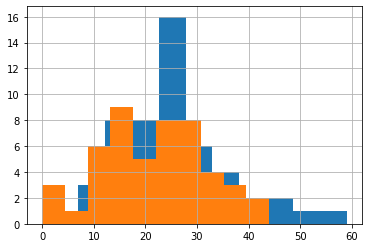

In [60]:
away.score_away.hist()
away.score_home.hist()

In [63]:
away.corr()['home_win'].sort_values(ascending=False)

home_win            1.000000
score_home          0.672558
home_fav            0.259706
stadium_neutral     0.135755
team_home           0.015669
schedule_playoff   -0.012653
spread_favorite    -0.172569
weather_wind_mph   -0.204227
schedule_season    -0.238120
score_away         -0.493458
team_away                NaN
weather_humidity         NaN
Name: home_win, dtype: float64

,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,home_win,home_fav
schedule_date,,,,,,,,,,,,,,,,,,
2014-09-04,2014,1,False,28,36.0,16.0,12,28,-4.5,46.5,CenturyLink Field,False,67.5,5.0,NaN,NaN,1,1
2014-09-07,2014,1,False,2,37.0,34.0,21,21,-3.0,52,Georgia Dome,False,72.5,0.0,NaN,DOME,1,0
2014-09-07,2014,1,False,3,16.0,23.0,7,3,-1.0,42.5,M&T Bank Stadium,False,77.5,0.0,NaN,NaN,0,1
2014-09-07,2014,1,False,6,20.0,23.0,4,6,-7.0,47,Soldier Field,False,77.5,7.0,NaN,NaN,0,1
2014-09-07,2014,1,False,9,17.0,28.0,27,27,-3.5,51,Cowboys Stadium,False,72.5,0.0,NaN,DOME,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-08,2019,14,False,21,46.0,48.0,27,27,-2.5,43.5,Mercedes-Benz Superdome,False,72.5,0.0,NaN,DOME,0,0
2019-12-08,2019,14,False,23,22.0,21.0,19,23,-5.0,46,MetLife Stadium,False,37.5,5.0,NaN,NaN,1,1
2019-12-08,2019,14,False,24,21.0,42.0,30,30,-3.0,47.5,Oakland Coliseum,False,57.5,6.0,NaN,NaN,0,0
